# Loading Statistical Modeling

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc ,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,mean_squared_error,mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt
import math
import time

# Load the required libraries and Dataset

In [3]:
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle


import pandas as pd
#Load the data
df = pd.read_csv('bankfull.txt',sep=";")


#View the data
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,decision
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#View the shape of the data
df.shape

(41188, 21)

# Data Preprocessing
As our dataset has 10 categorical features we will need to encode these features into a numerical representation.From the EDA Report we know that the dataset contain 12 duplicate records. Below we will drop those records for better efficiency

In [5]:
data_dup = df[df.duplicated(keep = "last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,decision
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


# Dealing with Duplicate Values:

In [6]:
data = df.drop_duplicates()
data.shape


(41176, 21)

# Separating Independent and Class variables

In [7]:
data_x = data.iloc[:, :-1]
print("Shape of X:",data_x.shape)
data_y = data["decision"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


# Converting Categorical Variables to Numeric

In [8]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, data_x):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding dataset 
    temp_cols = Vectorizer.fit_transform(data_x[i])
    data_x = add_onehot_to_dataframe(temp_cols, data_x, Vectorizer, i)

In [10]:
import warnings
warnings.filterwarnings("ignore")

OneHotEncoder(categorical_cols, data_x)
data_x.info()
data_x.shape

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 73 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   job                            41176 non-null  object 
 2   marital                        41176 non-null  object 
 3   education                      41176 non-null  object 
 4   default                        41176 non-null  object 
 5   housing                        41176 non-null  object 
 6   loan                           41176 non-null  object 
 7   contact                        41176 n

(41176, 73)

In [11]:
data_x = data_x.drop(['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome'], axis=1 )
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   duration                       41176 non-null  int64  
 2   campaign                       41176 non-null  int64  
 3   pdays                          41176 non-null  int64  
 4   previous                       41176 non-null  int64  
 5   emp.var.rate                   41176 non-null  float64
 6   cons.price.idx                 41176 non-null  float64
 7   cons.conf.idx                  41176 non-null  float64
 8   euribor3m                      41176 non-null  float64
 9   nr.employed                    41176 non-null  float64
 10  job_admin.                     41176 non-null  int64  
 11  job_blue-collar                41176 non-null  int64  
 12  job_entrepreneur               41176 non-null 

# Replace "no" with 0 and "yes" with 1

In [12]:
data_y.replace({"no":0,"yes":1}, inplace=True)

# Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Create a SelectKBest object with f_classif score function and k=15
skb = SelectKBest(f_classif, k=15)

# Fit the SelectKBest object on the dataset X and target variable y
X_new = skb.fit_transform(data_x, data_y)

# Get the indices of the selected features
selected_indices = skb.get_support(indices=True)

# Get the names of the selected columns from the original dataset X
selected_columns = data_x.columns[selected_indices]

# Print the names of the selected columns
print(selected_columns)

Index(['duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'euribor3m', 'nr.employed', 'contact_cellular', 'contact_telephone',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


# As duration column is highly co-relted, we will drop the column and proceed with the Modeling

In [14]:
New_data_x = data_x.loc[:,['pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'euribor3m', 'nr.employed', 'contact_cellular', 'contact_telephone',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success']]
New_data_x.head(10)

,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact_cellular,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
1,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
2,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
3,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
4,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
5,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
6,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
7,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
8,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0
9,999,0,1.1,93.994,4.857,5191.0,0,1,0,1,0,0,1,0


# Splitting the data
We will apply 64% , 16% , 20% for train, CV and test datasets rspectively

In [15]:
from sklearn.model_selection import train_test_split

x_rest, x_test, y_rest, y_test = train_test_split(New_data_x, data_y, test_size = 0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_rest, y_rest, test_size = 0.2)

print("X Train:", x_train.shape)
print("X CV:", x_cv.shape)
print("X Test:", x_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 14)
X CV: (6588, 14)
X Test: (8236, 14)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


# Resolving Imbalance in the target variable

In [16]:
# Perform oversampling on the training data using SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train a classifier on the oversampled training data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_resampled, y_train_resampled)

# Test the classifier on the testing data
y_pred = clf.predict(x_test)

# 1. Logistics Regression

In [17]:
model = LogisticRegression(class_weight='balanced')

# Start the timer
start_time = time.time()

model.fit(x_train_resampled, y_train_resampled)
y_pred_proba = model.predict_proba(x_test)[:, 1] # positive class probabilities

y_pred = (y_pred_proba > 0.5).astype(int) # binary predictions using threshold 0.5

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(model).__sizeof__()

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("ROC AUC score:", roc_auc)
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

Accuracy: 0.7548567265662943
ROC AUC score: 0.7704045176736574
Processing time:  0.10251855850219727 seconds
Model size: 1156.00 bytes


# Cross validation of Logistic Regression

In [18]:
# Start the timer
start_time = time.time()

# calculate cross-validation scores
scores = cross_val_score(model, New_data_x, data_y, cv=5, scoring='roc_auc')

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(model).__sizeof__()

# print mean and standard deviation of scores
print("ROC-AUC scores: ", scores)
print("Mean ROC-AUC: ", scores.mean())
print("Standard deviation: ", scores.std())
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

ROC-AUC scores:  [0.85102747 0.68059947 0.43766886 0.97231044 0.86245166]
Mean ROC-AUC:  0.7608115792110693
Standard deviation:  0.18657791047379754
Processing time:  0.5270922183990479 seconds
Model size: 1156.00 bytes


<IPython.core.display.Javascript object>


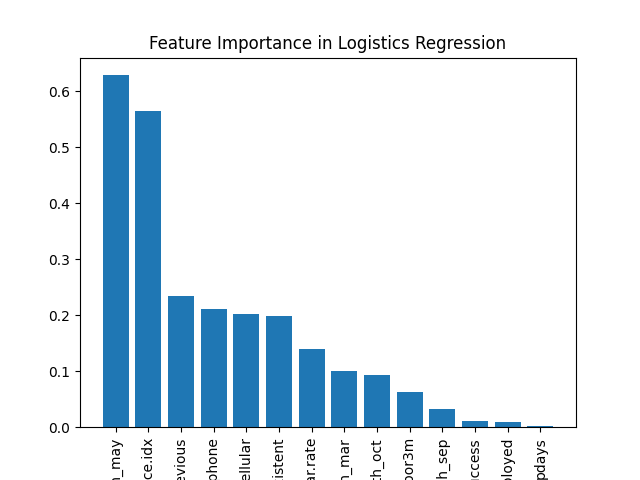

In [20]:
# Get feature importances
importances = np.abs(model.coef_)[0]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [New_data_x.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance in Logistics Regression")

# Add bars
plt.bar(range(New_data_x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(New_data_x.shape[1]), names, rotation=90)

# Show plot
plt.show()

# ROC Curve

<IPython.core.display.Javascript object>


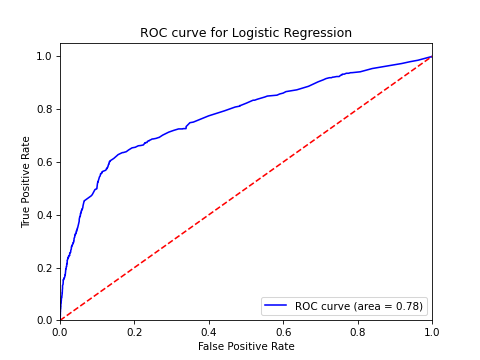

In [80]:
# Fit the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(x_train_resampled, y_train_resampled)

# Predict probabilities on test set
y_pred_prob = model.predict_proba(x_test)[:, 1]

# Calculate false positive rate, true positive rate and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [62]:
from sklearn.metrics import classification_report

classification_report(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      5965
           1       0.67      0.26      0.38      2271

    accuracy                           0.76      8236
   macro avg       0.72      0.61      0.62      8236
weighted avg       0.74      0.76      0.72      8236



# 2. KNN

In [65]:
# Create a KNN classifier object
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# Start the timer
start_time = time.time()

# Fit the classifier to the training data
knn.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = knn.predict(x_test)

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(knn).__sizeof__()

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

Accuracy :  0.8838028169014085
Processing time:  0.9376637935638428 seconds
Model size: 6320090.00 bytes


# Cross Validation

In [64]:
k = 15
knn = KNeighborsClassifier(n_neighbors=k)

# Start the timer
start_time = time.time()

# calculate cross-validation score with 5 folds
cv_scores = cross_val_score(knn, x_train_resampled, y_train_resampled, cv=5)

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(knn).__sizeof__()

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

Cross-validation scores:  [0.70864541 0.71934517 0.71848919 0.71453028 0.71463728]
Mean cross-validation score:  0.7151294671517225
Processing time:  4.371266841888428 seconds
Model size: 274.00 bytes


# ROC Curve

<IPython.core.display.Javascript object>


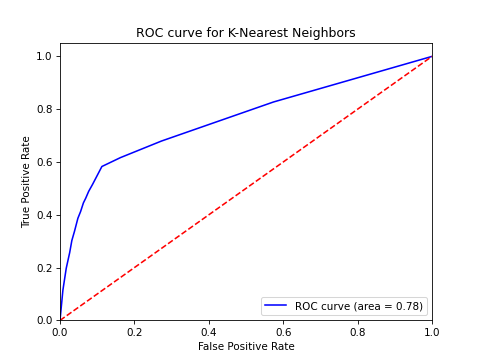

In [81]:
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier

k = 15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_resampled, y_train_resampled)

# Get predicted probabilities for the positive class
y_pred_prob = knn.predict_proba(x_test)[:, 1]


# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()

<IPython.core.display.Javascript object>


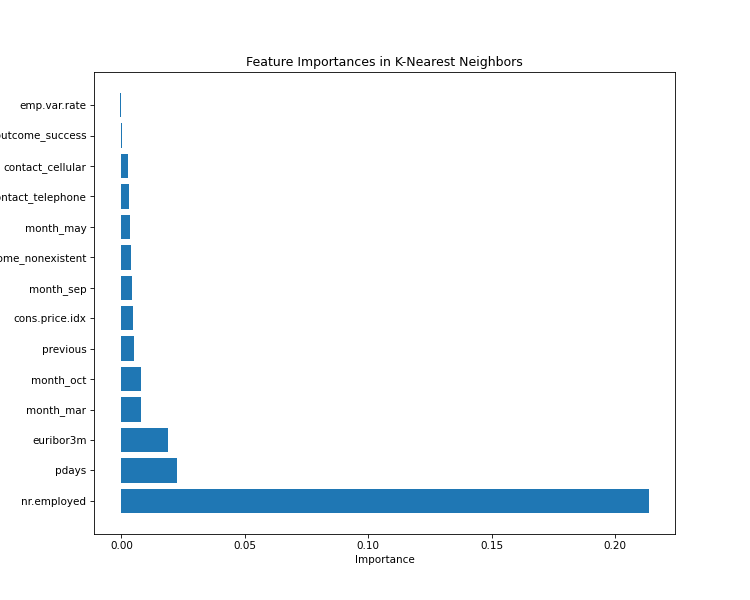

In [83]:
# Compute feature importances using permutation importance
importances = permutation_importance(knn, x_train_resampled, y_train_resampled)

# Sort feature importances in descending order
sorted_idx = importances.importances_mean.argsort()[::-1]
importances_sorted = importances.importances_mean[sorted_idx]
features_sorted = New_data_x.columns[sorted_idx]


# Create a horizontal bar chart for feature importances
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.barh(features_sorted, importances_sorted)
ax.set_xlabel('Importance')
ax.set_title('Feature Importances in K-Nearest Neighbors')

plt.show()

In [68]:
from sklearn.metrics import classification_report

classification_report(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7377
           1       0.45      0.46      0.45       859

    accuracy                           0.88      8236
   macro avg       0.69      0.70      0.69      8236
weighted avg       0.89      0.88      0.88      8236



# 3. Random Forest

In [69]:
# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100)

# Start the timer
start_time = time.time()

# Fit the classifier to the training data
rf.fit(x_train_resampled, y_train_resampled)


# Make predictions on the test data
y_pred = rf.predict(x_test)

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(rf).__sizeof__()

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

Accuracy:  0.8428848955803788
Processing time:  1.5592730045318604 seconds
Model size: 19636975.00 bytes



# Cross Validation

In [84]:
# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100)

# Start the timer
start_time = time.time()

# Calculate cross-validation score with 5 folds
cv_scores = cross_val_score(rf, x_train_resampled, y_train_resampled, cv=5)

# Stop the timer
end_time = time.time()

# Calculate the processing time
processing_time = end_time - start_time

# Calculate model size in bytes
model_size = pickle.dumps(rf).__sizeof__()


print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())
print("Processing time: ", processing_time, "seconds")
print("Model size: {:.2f} bytes".format(model_size))

Cross-validation scores:  [0.74791355 0.77423497 0.77113204 0.76706612 0.77059705]
Mean cross-validation score:  0.7661887438476354
Processing time:  6.203088283538818 seconds
Model size: 665.00 bytes


# ROC Curve

<IPython.core.display.Javascript object>


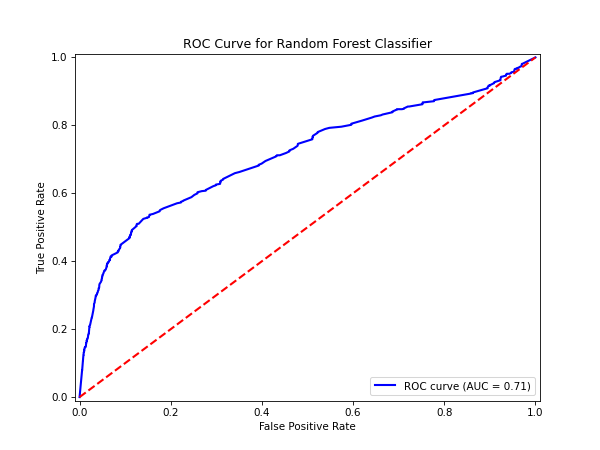

In [82]:
# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rf.fit(x_train_resampled, y_train_resampled)

# Predict probabilities of the positive class for the test data
y_prob = rf.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [74]:
from sklearn.metrics import classification_report

classification_report(y_pred, y_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6968
           1       0.49      0.34      0.40      1268

    accuracy                           0.84      8236
   macro avg       0.69      0.64      0.66      8236
weighted avg       0.82      0.84      0.83      8236



# Feature Importance using Random Forest Classifier

<IPython.core.display.Javascript object>


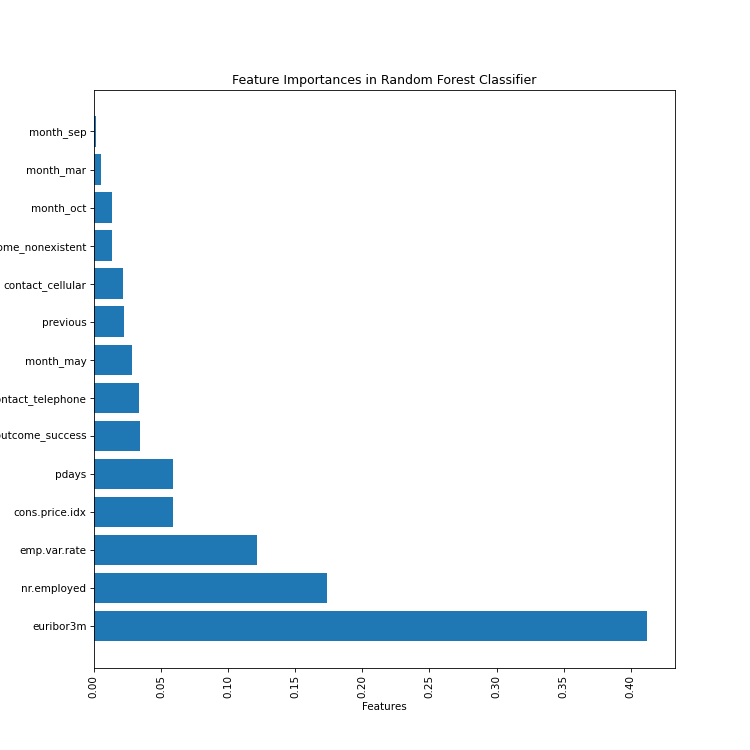

In [78]:
# Get feature importances
importances = rf.feature_importances_
features = x_train_resampled.columns

# Create a dataframe with feature importances
df = pd.DataFrame({'feature': features, 'importance': importances})

# Sort the dataframe by feature importances in descending order
df = df.sort_values(by=['importance'], ascending=False)

# Create bar plot
plt.figure(figsize=(10,10))
plt.barh(df['feature'], df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.show()